In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir = '/home/mei/nas/docker/processedData/'

In [2]:
def round_up(x, base=5):
    return base * round(x/base)

In [4]:
df = pd.read_csv(datadir + 'vitalPeriodic.csv.gz', compression='gzip')

In [ ]:
df.head()

,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
0,37376747,141168,2059,NaN,NaN,92.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37404957,141168,1289,NaN,NaN,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37385871,141168,1794,NaN,91.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37401664,141168,1374,NaN,90.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37377404,141168,2039,NaN,98.0,92.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_patient = pd.read_csv(porcesseddir + 'selected_patients.csv')
df_selected_vitalP= pd.merge(df_patient, df, on='patientunitstayid')
df_selected_vitalP.head()

,patientunitstayid,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus,...,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
0,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df_selected_vitalP.copy()
# Set indices
df.set_index(['patientunitstayid', 'observationoffset'], inplace = True)
df.drop(df.index[np.where(df.index.get_level_values('observationoffset') < 0)], inplace= True)
df.drop(columns = 'vitalperiodicid', inplace= True)
df.sort_index(level = ['patientunitstayid', 'observationoffset'], inplace = True)
columns_to_drop = ['hospitaladmitoffset','gender','age','apacheadmissiondx','unitadmitsource','admissionweight','dischargeweight','unitdischargelocation','unitdischargestatus'] 
df= df.drop(columns=columns_to_drop)
# Resample every 5 mins
df.rename(round_up, level = 'observationoffset', inplace = True)
df = df.groupby(['patientunitstayid', 'observationoffset']).mean()



In [8]:
df.head(n=10)

temperature  sao2  heartrate  \
patientunitstayid observationoffset                                 
141168            120                        NaN  93.0      140.0   
                  125                        NaN   NaN      140.0   
                  130                        NaN   NaN      140.0   
                  135                        NaN   NaN      140.0   
                  140                        NaN   NaN      140.0   
                  145                        NaN   NaN      140.0   
                  150                        NaN   NaN      140.0   
                  155                        NaN   NaN      136.0   
                  160                        NaN   NaN      132.0   
                  165                        NaN   NaN      132.0   

                                     respiration  cvp  etco2  \
patientunitstayid observationoffset                            
141168            120                        NaN  NaN    NaN   
                  125                        NaN  NaN    NaN   
                  130                        NaN  NaN    NaN   
                  135                        NaN  NaN    NaN   
                  140                        NaN  NaN    NaN   
                  145                        NaN  NaN    NaN   
                  150                        NaN  NaN    NaN   
                  155                        NaN  NaN    NaN   
                  160                        NaN  NaN    NaN   
                  165                        NaN  NaN    NaN   

                                     systemicsystolic  systemicdiastolic  \
patientunitstayid observationoffset                                        
141168            120                             NaN                NaN   
                  125                             NaN                NaN   
                  130                             NaN                NaN   
                  135                             NaN                NaN   
                  140                             NaN                NaN   
                  145                             NaN                NaN   
                  150                             NaN                NaN   
                  155                             NaN                NaN   
                  160                             NaN                NaN   
                  165                             NaN                NaN   

                                     systemicmean  pasystolic  padiastolic  \
patientunitstayid observationoffset                                          
141168            120                         NaN         NaN          NaN   
                  125                         NaN         NaN          NaN   
                  130                         NaN         NaN          NaN   
                  135                         NaN         NaN          NaN   
                  140                         NaN         NaN          NaN   
                  145                         NaN         NaN          NaN   
                  150                         NaN         NaN          NaN   
                  155                         NaN         NaN          NaN   
                  160                         NaN         NaN          NaN   
                  165                         NaN         NaN          NaN   

                                     pamean  st1  st2  st3  icp  
patientunitstayid observationoffset                              
141168            120                   NaN  NaN  NaN  NaN  NaN  
                  125                   NaN  NaN  NaN  NaN  NaN  
                  130                   NaN  NaN  NaN  NaN  NaN  
                  135                   NaN  NaN  NaN  NaN  NaN  
                  140                   NaN  NaN  NaN  NaN  NaN  
                  145                   NaN  NaN  NaN  NaN  NaN  
                  150                   NaN  NaN  NaN  NaN  N

In [9]:
# df.to_csv(porcesseddir + 'selected_vitalPeriodic.csv',  index=True)
# print("Data exported successfully to 'selected_vitalPeriodic.csv'.")

Data exported successfully to 'selected_vitalPeriodic.csv'.


In [10]:
selected_vP_p=len(list(df.index.get_level_values('patientunitstayid').unique()))
selected_vP_x=len(df)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(selected_vP_p,selected_vP_x))

There are 99652 unique patientunitstayid in the selected patients with the total 74825151 records.


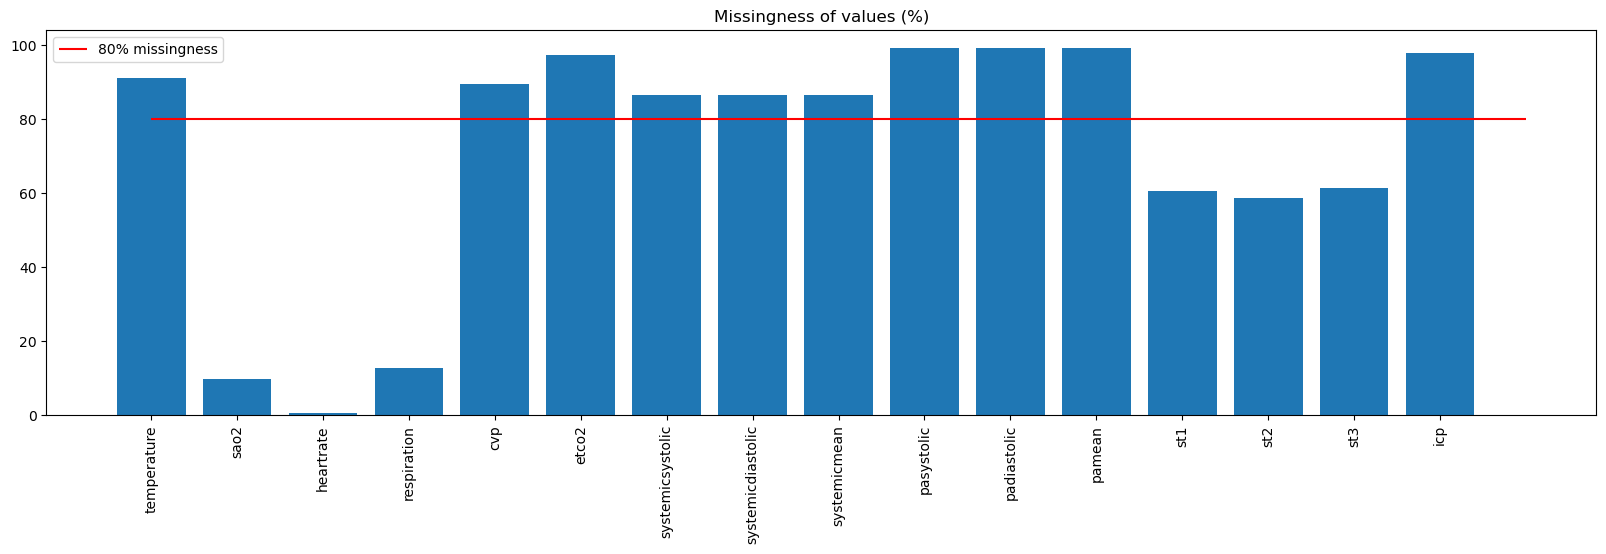

In [11]:
missing_ratio = pd.DataFrame(df.isna().sum() / len(df.index), columns = ['missing ratio']) * 100
plt.rcParams["figure.figsize"] = (20,5)
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [13]:
min_missingness = 80
vitals_to_include = missing_ratio[missing_ratio['missing ratio'] < min_missingness].index.values.tolist()
df = df[vitals_to_include]


In [14]:
df.describe()

,sao2,heartrate,respiration,st1,st2,st3
count,6.762335e+07,7.441786e+07,6.528284e+07,2.942873e+07,3.098804e+07,2.878861e+07
mean,9.667848e+01,8.510957e+01,2.010924e+01,1.292056e+00,2.206929e+00,1.878979e+00
std,3.821015e+00,1.842550e+01,1.033172e+01,1.068213e+01,1.581945e+01,1.429199e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+01,-1.960000e+01,-2.500000e+01
25%,9.500000e+01,7.200000e+01,1.600000e+01,-1.600000e-01,-3.000000e-01,-2.000000e-01
50%,9.700000e+01,8.400000e+01,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.900000e+01,9.700000e+01,2.300000e+01,1.500000e-01,3.000000e-01,2.400000e-01
max,2.390000e+02,3.000000e+02,6.301200e+04,1.250000e+03,1.260000e+03,1.330000e+03


In [15]:
def is_dead(x):
    if x == 'EXPIRED':
        return True
    return False

In [16]:
mean = df.groupby(['patientunitstayid']).mean()
print('Mean value of vital signs over ICU stay for each patient')
mean.head()

Mean value of vital signs over ICU stay for each patient


,sao2,heartrate,respiration,st1,st2,st3
patientunitstayid,,,,,,
141168,86.325843,110.557416,NaN,NaN,NaN,NaN
141178,92.000000,88.000000,NaN,0.000000,-0.500000,-0.500000
141197,94.071429,97.307692,23.846154,0.015385,-0.500000,-0.469231
141208,96.179487,77.817460,17.476190,0.018504,0.143701,0.040157
141229,95.032258,66.225806,21.419355,0.451613,0.035484,-0.412903


In [17]:
std = df.groupby(['patientunitstayid']).std()
print('Standard deviation of vital signs over ICU stay for each patient')
std.head()

Standard deviation of vital signs over ICU stay for each patient


,sao2,heartrate,respiration,st1,st2,st3
patientunitstayid,,,,,,
141168,13.075633,22.215811,NaN,NaN,NaN,NaN
141178,NaN,NaN,NaN,NaN,NaN,NaN
141197,0.730046,3.568020,0.898717,0.211527,1.120268,0.846940
141208,0.996679,8.120493,6.302653,0.064796,0.115812,0.083817
141229,3.270921,5.018032,4.295534,0.156782,0.048637,0.158623
